## OBJECTIVE : 

### Performing EDA over threat and non-threat texts.

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import os
import sys
import ipdb
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

print("Numpy Version : ", np.__version__)
print("Pandas Version : ", pd.__version__)

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

print("Matplotlib Version : ", mpl.__version__)

Numpy Version :  1.18.1
Pandas Version :  1.0.1
Matplotlib Version :  3.1.3


In [3]:
DATA_DIR = "../data/"
OBJECT_DIR = "../objects/"
LOG_DIR = "../logs/"

In [4]:
LUCKY_SEED = 42

In [5]:
RAW_DATA_DIR = os.path.join(DATA_DIR, "raw_data")

In [13]:
# Read data
train_data = pd.read_csv(os.path.join(RAW_DATA_DIR, "train_data.csv"))
print("Shape of train data : {}".format(train_data.shape))
print()
print("Features in train data : {}".format(train_data.columns.values))
print()
print("Train Dataframe Information : ")
print(train_data.info())

Shape of train data : (800, 2)

Features in train data : ['comment_text' 'threat']

Train Dataframe Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_text  800 non-null    object
 1   threat        800 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.6+ KB
None


In [14]:
# Read test data
test_data = pd.read_csv(os.path.join(RAW_DATA_DIR, "test_data.csv"))
print("Shape of test data : {}".format(test_data.shape))
print()
print("Features in test data : {}".format(test_data.columns.values))
print()
print("Test Dataframe Information : ")
print(test_data.info())

Shape of test data : (156, 2)

Features in test data : ['comment_text' 'threat']

Test Dataframe Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_text  156 non-null    object
 1   threat        156 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB
None


#### Analysis of train data

In [15]:
train_data["threat"].value_counts()

1    400
0    400
Name: threat, dtype: int64

In [17]:
train_data.drop_duplicates(subset="comment_text").shape, train_data.shape, train_data.drop_duplicates().shape

((800, 2), (800, 2), (800, 2))

In [23]:
classes_dict = {0: "non_threat", 1: "threat"}

Different types of comments and their counts : 


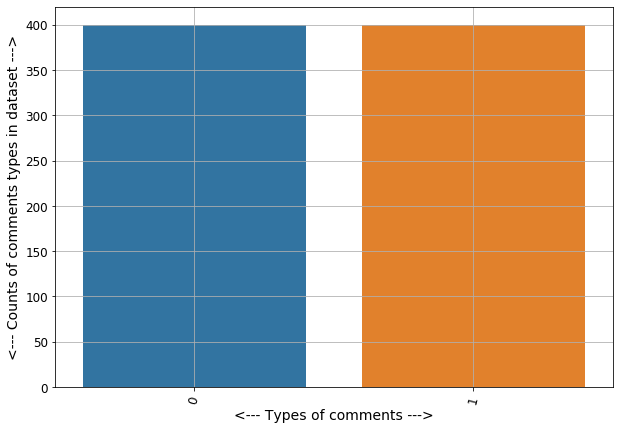

In [19]:
print('Different types of comments and their counts : ')
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(train_data["threat"].value_counts().index, train_data["threat"].value_counts().values)
plt.xticks(rotation=75)
plt.grid()
plt.xlabel('<--- Types of comments --->')
plt.ylabel('<--- Counts of comments types in dataset --->')
plt.show()

In [20]:
train_data["lcased_text"] = train_data["comment_text"].map(lambda x:x.lower())

In [21]:
def create_wordcloud(sentences, label):
    print("Target Type : ", label)
    fig_dims = (20, 12)
    text = ' '.join(sentences) 
    wordcloud = WordCloud(stopwords=STOPWORDS, max_words=200, background_color="white").generate(text)
    fig, ax = plt.subplots(figsize=fig_dims)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def get_word_count(text):
    word_count = 0
    sentences = sent_tokenize(text)
    for sen in sentences:
        word_count += len(word_tokenize(sen))
    return word_count

Target Type :  non_threat


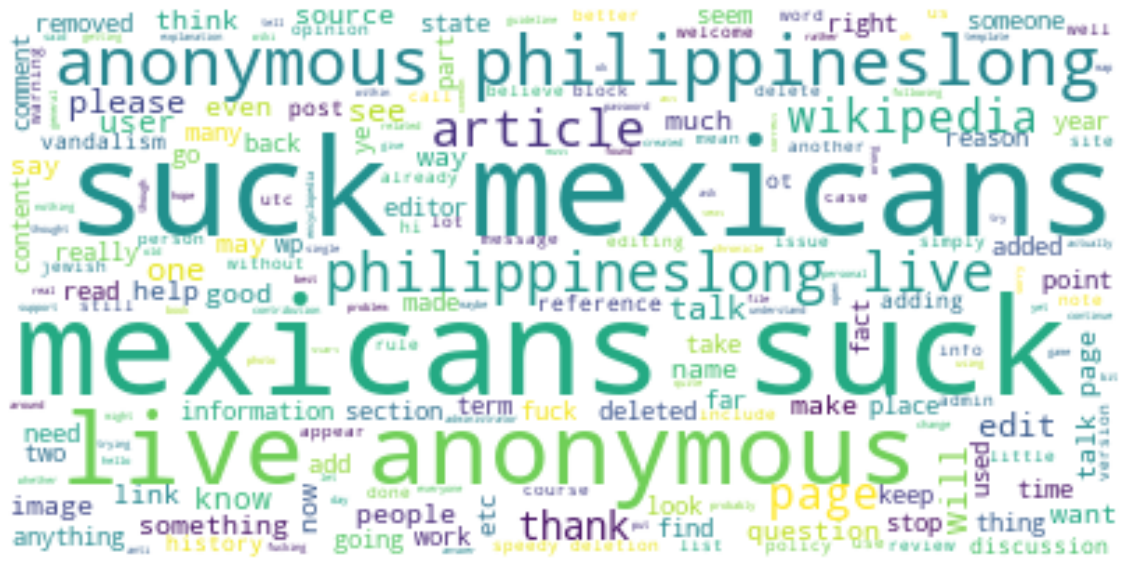

Target Type :  threat


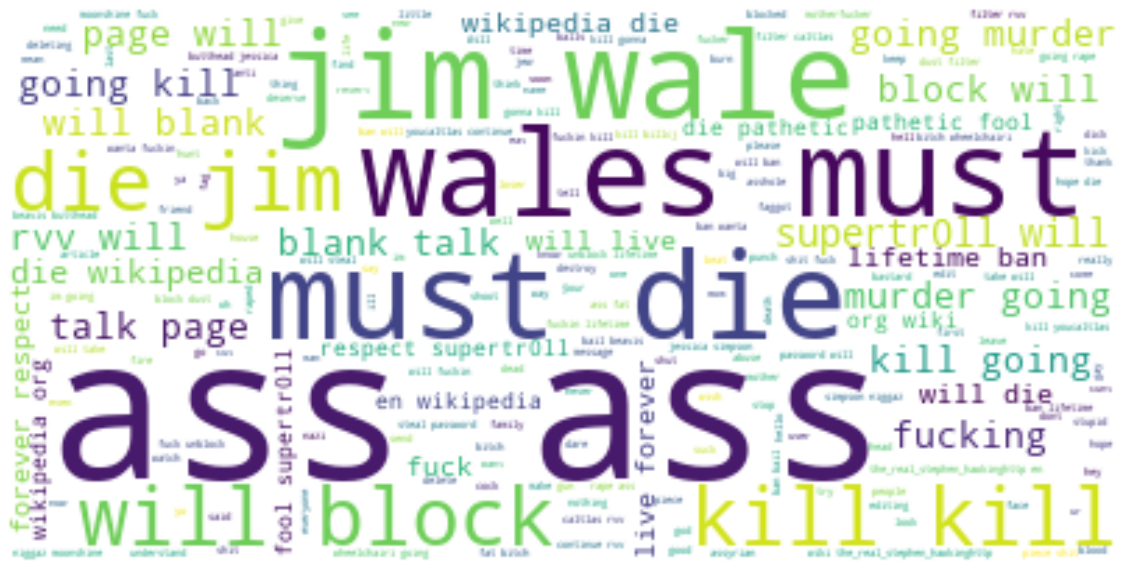

In [24]:
for c in range(len(classes_dict)):
    create_wordcloud(train_data.loc[train_data["threat"]==c, "lcased_text"].values, classes_dict[c])